In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\mbawala\miniconda3\envs\tony_ml\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import warnings
from urllib import *
from sklearn.datasets import  fetch_openml
from sklearn.exceptions import ConvergenceWarning
X,y = fetch_openml('mnist_784', version=1, return_X_y =True)
X, y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [3]:
X, y
X.shape #this means we have 70,000 images each with 28 pixels

(70000, 784)

In [4]:
y.shape

(70000,)

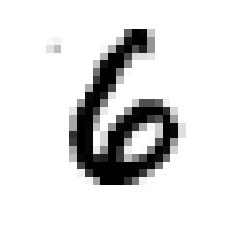

In [5]:
#let's grab some image from the dataset
some_digit = X[50941]
some_digit_image = some_digit.reshape(28, 28) #reshaping it to 28, 28 pixels
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation= 'nearest')
plt.axis('off')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
#lets shuffle the training data
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
#creating a binary classifier
#here we use stochastic gradient descent, this is efficient in training large datasets
#take eg fig 6 above, the 6_clf will be able to distinguish either a fig is no 6 or not


In [10]:
y_train_6 = (y_train == '6')
X_train_6 = (X_train == '6')

<ipython-input-10-6b2365b9fa93>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_train_6 = (X_train == '6')


In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)

In [12]:
#sgd_clf.fit(X_train, y_train_6)
sgd_clf.fit(X_train, y_train_6)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])

array([ True])

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_6):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_6[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_6[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

C:\Users\mbawala\miniconda3\envs\tony_ml\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9772
0.9796
0.98245


In [15]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv= 3)

In [17]:
y_train_pred.shape

(60000,)

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_6, y_train_pred)

0.8808097165991903

In [19]:
#let's evaluate it using cross val
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_6, cv= 3, scoring= 'accuracy')

array([0.9772 , 0.9796 , 0.98245])

accuracy is not always a good method to evaluate classification models  it's a ratio of TP/total outcomes
instead use prec and recall method
take an eg of search bar in amazon and type word iphone, precision is the ratio of the results generated to the relevant searches
while recall is the ratio of results generated to the all possible results that could be generated
prec = TP / TP +FP and recall= TP/ TP + FN

In [20]:
#another metrics 
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_6, y_train_pred)
#the above arguments are all TP, and the ones that are classified as TP or FN

0.8808097165991903

In [21]:
precision_score(y_train_6, y_train_pred)
#similarly to precision_score(), it takes same argument as precision_score()

0.8808097165991903

To understand this tradeoff, let’s look at how the SGDClassifier makes its classification
decisions. For each instance, it computes a score based on a decision function,
and if that score is greater than a threshold, it assigns the instance to the positive
class, or else it assigns it to the negative class. Figure 3-3 shows a few digits positioned
from the lowest score on the left to the highest score on the right. Suppose the decision
threshold is positioned at the central arrow (between the two 5s): you will find 4
true positives (actual 5s) on the right of that threshold, and one false positive (actually
a 6). Therefore, with that threshold, the precision is 80% (4 out of 5). But out of 6
actual 5s, the classifier only detects 4, so the recall is 67% (4 out of 6). Now if you
raise the threshold (move it to the arrow on the right), the false positive (the 6)
becomes a true negative, thereby increasing precision (up to 100% in this case), but
one true positive becomes a false negative, decreasing recall down to 50%. Conversely,
lowering the threshold increases recall and reduces precision.

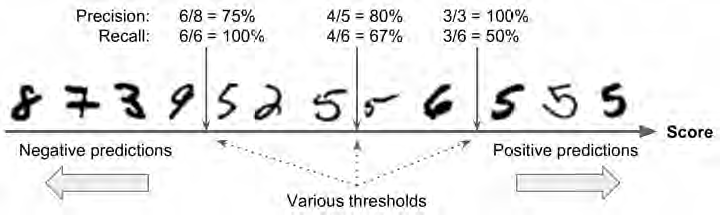

Scikit-Learn does not let you set the threshold directly, but it does give you access to
the decision scores that it uses to make predictions. Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a
score for each instance, and then make predictions based on those scores using any
threshold you want:

In [22]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([3142.73983492])

In [23]:
#now set the threshold to 0 and see how it predicts
threshold = 0
y_some_digit_predict = y_scores > threshold
y_some_digit_predict

array([ True])

In [24]:
#what if we raise the value of threshold?
threshold = 200000
y_some_digit_predict = y_scores > threshold
y_some_digit_predict

array([False])

In [25]:
#so how can i know which values of threshold to use?
#set the cross_val_pred method to decision_function
y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv= 5, method= 'decision_function')
y_scores

array([-21695.00119081, -50187.6245995 , -28958.4610786 , ...,
       -20184.0738503 , -34666.72846329, -13562.69659787])

now  with these scores you can draw a graph of all possible outcomes of the threshold

Note: there is an [issue](https://github.com/scikit-learn/scikit-learn/issues/9589) introduced in Scikit-Learn 0.19.0 where the result of `cross_val_predict()` is incorrect in the binary classification case when using `method="decision_function"`, as in the code above. The resulting array has an extra first dimension full of 0s. We need to add this small hack for now to work around this issue:

In [26]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_6, y_scores)
#the above fxn takes the arg of actual training data and the pred scores from the cross_val_predict class

In [28]:
#though you can select the value of threshold by using the second cell from this one
#the one below is just one of the ways to find for the value of threshold

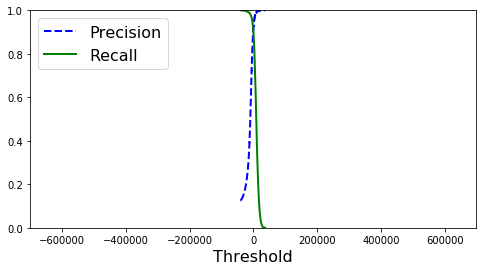

In [29]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4
                   ))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [30]:
# this is another method of selecting for value of threshold

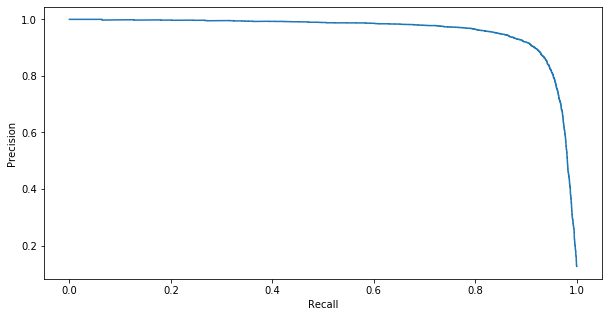

In [31]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
plt.figure(figsize= (10, 5))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [32]:
#the graph starts to fall sharply at around 80% recall
#select the prec/recall tradeoff just below that point like 60%

In [33]:
#lets say you want to have a 90% precision
#according to the book 'Hands on ml by oreilly', they set the thrshold value to 70000
#which they get precision of 89%, set it to 0 and you get 92%


In [34]:
y_train_pred = (y_scores > 0)
precision_score(y_train_6, y_train_pred)

0.9088453747467927

In [35]:
recall_score(y_train_6, y_train_pred)

0.909766813112538

another way to evaluate classification alg is to use ROC curves
The function roc_curve computes the receiver operating characteristic curve, or ROC curve. Quoting Wikipedia :
“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates
the performance of a binary classifier system as its discrimination threshold is varied.

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_6, y_scores)

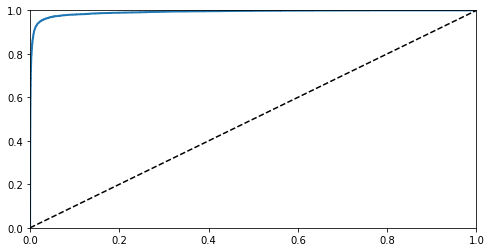

In [37]:
def plot_roc_curve(fpr, tpr, label= None):
    plt.plot(fpr, tpr, linewidth= 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize= (8,4))    
plot_roc_curve(fpr, tpr)
plt.show()

In [38]:
#compute the area under the curve
#a good value is auc approx = 1
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_6, y_scores)

0.9916190594585952

In [39]:
#create another clf and compare it's accuracy with that of sgd
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state= 40)
y_forest_probas = cross_val_predict(forest_clf, X_train, y_train_6, cv= 5, method= 'predict_proba')
y_forest_probas

array([[0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [40]:
#the above results are probabs, and we plot a graph with scores
#change them to scores
y_forest_scores = y_forest_probas[:, 1]
fpr_forest, tpr_forest, thresholds = roc_curve(y_train_6, y_forest_scores)

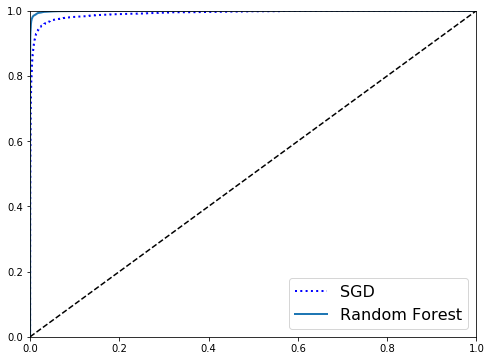

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [42]:
#compute its area under the curve
roc_auc_score(y_train_6, y_forest_scores)

0.9993271516814384

In [43]:
#multiclass classification for clf images from 0-9
sgd_clf.fit(X_train, y_train) #not y_train_6
sgd_clf.predict([some_digit])

array(['6'], dtype='<U1')

the above method is called one vs one method, under the hood sklearn has trained ten diff clf and the one with the highest scores is given as an output. to see what has happened use the decision_function(), instead of returning one scores it returns ten


In [44]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-20800.26389624, -20155.74407639,  -5143.24692595,
        -11862.91448383,  -3559.61342609,  -5448.49624292,
          6325.05142722, -23986.89641744,  -5364.38920503,
        -16457.7778429 ]])

In [45]:
#lets train a  random forest clf using one vs one method
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array(['6'], dtype=object)

In [46]:
#this time around sklearn didn't run ova or ovo coz forest_clf can handle multiple classes
#to see how it has assigned the probabilities that assinged to each class, use the predict_proba fxn
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [47]:
#evalute the scores using cross val
cross_val_score(sgd_clf, X_train, y_train, cv= 3, scoring= 'accuracy')

array([0.87635, 0.8791 , 0.88135])

In [54]:
#it has an accuracy of 86% but you can improve it by doing scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv= 3, scoring= 'accuracy')

C:\Users\mbawala\miniconda3\envs\tony_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\mbawala\miniconda3\envs\tony_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\mbawala\miniconda3\envs\tony_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.9038, 0.9043, 0.9079])

error analysis, here after getting the promising you want to check what kind of error it makes, this is done by calling the confusion matrix prob, but first you have to make predictions using the cross_val_predict then calling the confusion mat function

In [67]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\mbawala\miniconda3\envs\tony_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\mbawala\miniconda3\envs\tony_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\mbawala\miniconda3\envs\tony_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:554: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


NameError: name 'confusion_matrix' is not defined

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv= 2)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [ ]:
#represent the above nos in form of an image
plt.matshow(conf_mx, plt.cmap= plt.cm.gray)
plt.show()

multi classification, here you create a classifier that is able to make more than one output, say you give it a certain image and is able to identify it and also say that it's an odd or even no

In [68]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = int((y_train >= 7))
y_train_large = (y_train  >= 7)  #creates a  tuple of nos > 7
y_train_odd = (y_train % 2 == 1) # cretaes a tuple of odd nos
y_multi_label = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multi_label)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [ ]:
knn_clf.predict([some_digit])